# Breast Cancer
This data set contains dimensions of breasts with cancerous tumor and those with non-cancerous tumors.

In [1]:
#Load libraries for analysis
library(tidyverse)
library(corrplot)
library(caret)
library(randomForest)
library(e1071)
library(pROC)
library(glmnet)
library(rpart)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: foreach

Attaching package: ‘foreach’

The follo

### The data

In [2]:
cancer <- read.csv("data.csv")

Lets take a closer look at the data

In [3]:
names(cancer) #provides the list of data

[1] "id"                      "diagnosis"              
 [3] "radius_mean"             "texture_mean"           
 [5] "perimeter_mean"          "area_mean"              
 [7] "smoothness_mean"         "compactness_mean"       
 [9] "concavity_mean"          "concave.points_mean"    
[11] "symmetry_mean"           "fractal_dimension_mean" 
[13] "radius_se"               "texture_se"             
[15] "perimeter_se"            "area_se"                
[17] "smoothness_se"           "compactness_se"         
[19] "concavity_se"            "concave.points_se"      
[21] "symmetry_se"             "fractal_dimension_se"   
[23] "radius_worst"            "texture_worst"          
[25] "perimeter_worst"         "area_worst"             
[27] "smoothness_worst"        "compactness_worst"      
[29] "concavity_worst"         "concave.points_worst"   
[31] "symmetry_worst"          "fractal_dimension_worst"
[33] "X"

Data has two major segments and we will consider this in our analysis

In [4]:
head(cancer)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


In [5]:
str(cancer)

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se            

We first look at the classes of the various predictiors and it looks like overall, the class accurately match the data.

It appears that the X column might be a row of NAs so we take a closer look

In [6]:
summary(cancer$X) 

   Mode    NA's 
logical     569 

In [7]:
dim(cancer)

[1] 569  33

In [8]:
#since there are 569 NAs and the data has 569 rows, we can safely clean up column X 
cancer <- select(cancer, -X)
dim(cancer)

[1] 569  32

In [9]:
#check for any duplicates in data
n_distinct(cancer$id) #there are no duplicates

[1] 569

In [10]:
#Lets convert the diagnosis column into 0/1

cancer$y <- ifelse(cancer$diagnosis == "M", 1, 0)
summary(cancer$y) #checks whether conversion is accurately done

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3726  1.0000  1.0000 

### Splitting the data into train/test set

In [11]:
set.seed(1)
index <- sample(1:nrow(cancer), nrow(cancer) * 0.7)
trainSet <- cancer[index,]
testSet <- cancer[-index,]

Look at diagnosis column

In [12]:
type <- group_by(trainSet, diagnosis)
summarize(type, count = n()) #More benign cases than there are malignant

diagnosis,count
B,255
M,143


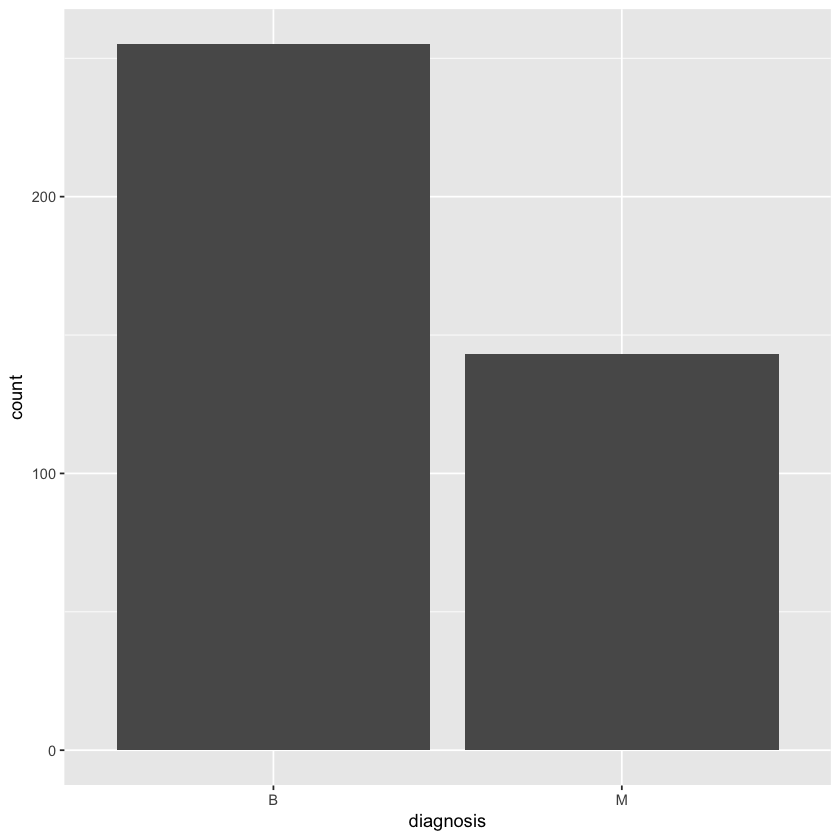

In [13]:
ggplot(trainSet) + geom_bar(mapping = aes(x = diagnosis))

Lets look at how other predictors determine whether a case is benign or malignant. This could be done using either or both:
    - Means
    - Surface Area
    
In this notebook however, we will just focus on using the means

### Means

In [14]:
Means <- select(trainSet, diagnosis, y, ends_with("mean"))
names(Means)

[1] "diagnosis"              "y"                      "radius_mean"           
 [4] "texture_mean"           "perimeter_mean"         "area_mean"             
 [7] "smoothness_mean"        "compactness_mean"       "concavity_mean"        
[10] "concave.points_mean"    "symmetry_mean"          "fractal_dimension_mean"

Lets look at the correlation between the respective variables

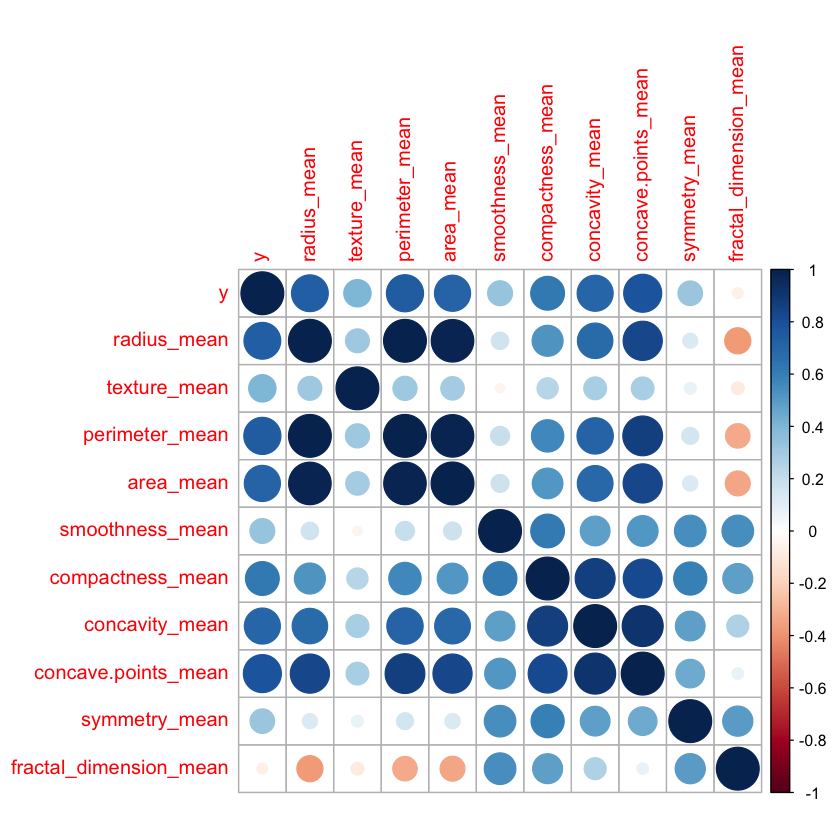

In [15]:
C <- cor(Means[2:12], use = "complete.obs", method = "pearson")
corrplot(C, method = "circle")

There appears to be multicollinearity present in the data. To deal with this and prevent affecting the results of our analysis, we drop the predictors that are highly correlated.

We suspect that the following variables are highly correlated:
    - radius mean, perimeter mean and area mean
    - concavity mean, concave point mean and compactness mean

Lets look at the actual figures

In [16]:
C

,y,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean
y,1.00000000,0.7367695,0.40701241,0.7498419,0.7105743,0.33743344,0.6217559,0.7067194,0.78707998,0.3286731,-0.06470702
radius_mean,0.73676953,1.0000000,0.31013100,0.9981534,0.9854555,0.16453874,0.5227185,0.6842092,0.83528779,0.1231577,-0.37010605
texture_mean,0.40701241,0.3101310,1.00000000,0.3162472,0.2998114,-0.04900594,0.2436772,0.2832040,0.28117297,0.0766000,-0.08954760
perimeter_mean,0.74984191,0.9981534,0.31624718,1.0000000,0.9849481,0.19636237,0.5691207,0.7190835,0.86027665,0.1564468,-0.32579768
area_mean,0.71057432,0.9854555,0.29981139,0.9849481,1.0000000,0.17452249,0.5107923,0.6944142,0.83461987,0.1274309,-0.33810731
smoothness_mean,0.33743344,0.1645387,-0.04900594,0.1963624,0.1745225,1.00000000,0.6186884,0.4826947,0.51463116,0.5419091,0.54474168
compactness_mean,0.62175591,0.5227185,0.24367723,0.5691207,0.5107923,0.61868840,1.0000000,0.8682888,0.82253192,0.5977265,0.48925259
concavity_mean,0.70671939,0.6842092,0.28320404,0.7190835,0.6944142,0.48269470,0.8682888,1.0000000,0.91493423,0.4807938,0.26291936
concave.points_mean,0.78707998,0.8352878,0.28117297,0.8602767,0.8346199,0.51463116,0.8225319,0.9149342,1.00000000,0.4447553,0.07163648
symmetry_mean,0.32867309,0.1231577,0.07660000,0.1564468,0.1274309,0.54190914,0.5977265,0.4807938,0.44475532,1.0000000,0.49484512


From the correlation matrix:
    - radius, perimeter and area means are highly correlated so we choose to use area_mean
    - concavity mean,concave.points_mean and compactness mean so we use concavity_mean

In [17]:
Means <- select(Means, -perimeter_mean, -radius_mean, - concave.points_mean, -compactness_mean)

Since area mean is correlated with concavity mean, lets plot their relationship

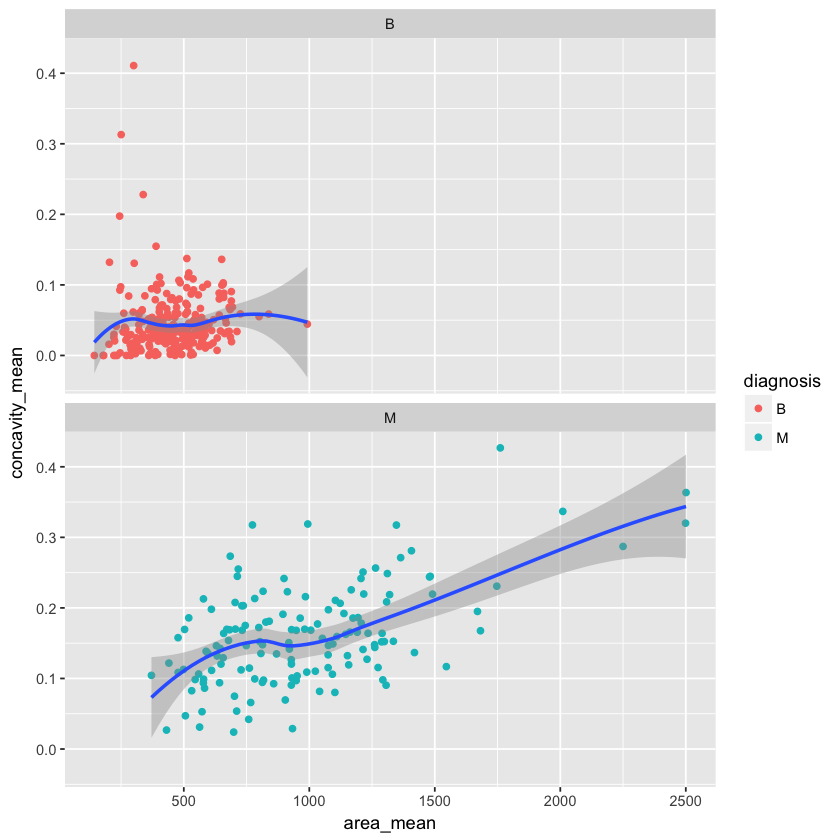

In [18]:
ggplot(Means, mapping = aes(x = area_mean, y = concavity_mean)) + 
  geom_point(mapping = aes(color = diagnosis)) + 
  geom_smooth(method = "loess") + facet_wrap(~diagnosis, nrow = 2)


On average, Malignant tumors appear to have a greater area mean when compared to Benign tumors. There is an upward trend in the graph of concavity_mean vs area_mean for Malignant tumors. While area_mean increases, concavity mean in general tends to increase.

For Benign tumors on the other hand, while area_mean increases, it appears that the concavity_mean generally does not exceed the 0.15 threshold, with the exception of a few data points.

#### Lets also take a look at the relationship between Fractal Dimension mean and Symmetry mean

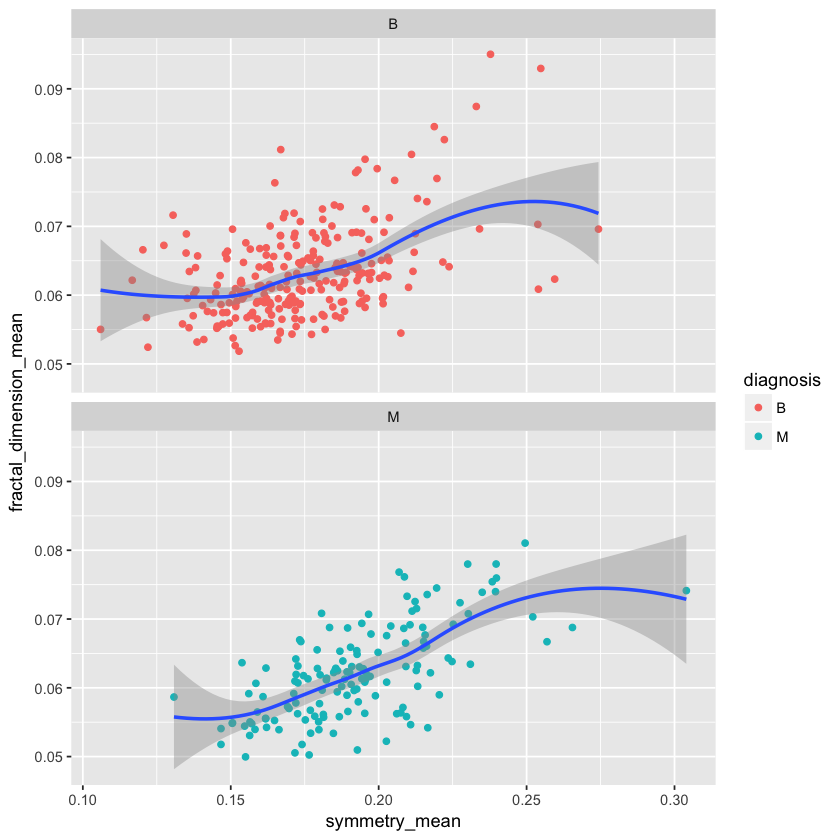

In [19]:
ggplot(Means, mapping = aes(x = symmetry_mean, y = fractal_dimension_mean)) + 
  geom_point(mapping = aes(color = diagnosis)) + 
  geom_smooth(method = "loess") + facet_wrap(~diagnosis, nrow = 2)

Both generally appear to have similar shapes to their loess lines and fractal dimension mean increases as symmetry  mean increases. Interestingly, for high symmetry_means, some Benign tumors have higher fractal dimension means relative to Malignant tumors. It is thus possible to conclude that the relationship between symmentry mean and fractal dimension mean has no bearing on whether cancer might be benign or malignant.

### Logistic regression

In [20]:
data_lr <- select(Means, -diagnosis)
data_lr$y <- factor(data_lr$y, c(0, 1))

model <- glm(y ~ ., 
             family = binomial(link = "logit"),
             data = data_lr)
summary(model)
print(names(data_lr))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = y ~ ., family = binomial(link = "logit"), data = data_lr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7140  -0.1560  -0.0333   0.0084   3.3398  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -29.724781   6.160194  -4.825 1.40e-06 ***
texture_mean             0.385204   0.077104   4.996 5.86e-07 ***
area_mean                0.014922   0.002825   5.282 1.27e-07 ***
smoothness_mean        112.824896  30.631282   3.683  0.00023 ***
concavity_mean          22.070216   6.794209   3.248  0.00116 ** 
symmetry_mean           18.041369  14.250433   1.266  0.20551    
fractal_dimension_mean -64.083849  70.405928  -0.910  0.36271    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 519.80  on 397  degrees of freedom
Residual deviance: 100.31  on 391  degrees of freedom
AIC: 114.31

Number of Fisher 

[1] "y"                      "texture_mean"           "area_mean"             
[4] "smoothness_mean"        "concavity_mean"         "symmetry_mean"         
[7] "fractal_dimension_mean"


It appears that *symmetry_mean* and *fractal_dimension_mean* are not important variables in fitting this logistic regression. We can test the hypothesis:

$$H_{0} : \beta_{fractal.dimension.mean} = \beta_{symmetry.mean} = 0$$ 
$$H_{a} : \text{At least one of the predictors is not 0}$$

But first we need to model the data again without these predictors

In [21]:
model2 <- glm(y ~ texture_mean + area_mean + smoothness_mean + concavity_mean, 
              family = binomial("logit"),
              data = data_lr)

summary(model2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = y ~ texture_mean + area_mean + smoothness_mean + 
    concavity_mean, family = binomial("logit"), data = data_lr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8372  -0.1569  -0.0358   0.0072   3.2662  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -31.417647   4.781491  -6.571 5.01e-11 ***
texture_mean      0.389224   0.077761   5.005 5.57e-07 ***
area_mean         0.015766   0.002423   6.506 7.70e-11 ***
smoothness_mean 117.050126  25.502107   4.590 4.44e-06 ***
concavity_mean   21.002821   4.719848   4.450 8.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 519.80  on 397  degrees of freedom
Residual deviance: 102.64  on 393  degrees of freedom
AIC: 112.64

Number of Fisher Scoring iterations: 8


In [22]:
1- pchisq(102.64-100.31, 2) 

[1] 0.3119227

We fail to reject the null hypothesis at the 5% sig level because p-value is 0.312 and this is greater than 0.05. Therefore, both fractal dimension mean and symmetry mean are not relevant in predicting whether a cancer will be benign or malignant.

**Predict on the test data**

In [23]:
pred.glm <- predict(model2, newdata = testSet, type="response")
pred.glm <- ifelse(pred.glm>0.5, "Malignant", "Benign")
table(pred = pred.glm, y = testSet$diagnosis)

           y
pred         B  M
  Benign    98  7
  Malignant  4 62

In [24]:
#Lets measure the predictive performance of the model
pred.glm <- ifelse(pred.glm== "Malignant", 1,0)
t = confusionMatrix(table(pred.glm, testSet$y))
(Accuracy = t$overall["Accuracy"])

(Kappa = t$overall["Kappa"])

RMSE = sqrt(mean(pred.glm - testSet$y)^2)
cat("RMSE:", RMSE, sep=" ")

Accuracy 
0.9356725

Kappa 
0.8654218

RMSE: 0.01754386

***After looking at values for RMSE, AUC and Kappa, it can be inferred that the model does a fairly good job at predicting whether a cancer would be benign or malignant***

### Random Forest

In [25]:
model.rf <- randomForest(y~.,
                        data = data_lr,
                        mtry = floor(sqrt(ncol(data_lr)/2)),
                        importance = T)
print(model.rf)


Call:
 randomForest(formula = y ~ ., data = data_lr, mtry = floor(sqrt(ncol(data_lr)/2)),      importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 5.28%
Confusion matrix:
    0   1 class.error
0 251   4  0.01568627
1  17 126  0.11888112


In [26]:
varImp(model.rf)

,0,1
texture_mean,18.22546,18.22546
area_mean,33.90938,33.90938
smoothness_mean,14.21893,14.21893
concavity_mean,26.90094,26.90094
symmetry_mean,8.82229,8.82229
fractal_dimension_mean,10.64111,10.64111


Interestingly, both *symmetry_mean* and *fractal_dimension_mean* have the smallest level of importance relative to the other predictors. This aligns with the conclusion reached via the logistic regression model.

In [27]:
pred.rf <- predict(model.rf, newdata = testSet, type="prob")
prediction <- ifelse(pred.rf[,2]>0.5, 1, 0)
(mat = table(prediction, testSet$y))

          
prediction  0  1
         0 98 10
         1  4 59

In [28]:
t = confusionMatrix(mat)
(Accuracy = t$overall["Accuracy"])

(Kappa = t$overall["Kappa"])

RMSE = sqrt(mean(pred.rf[,2] - testSet$y)^2)
cat("RMSE:", RMSE, sep=" ")

Accuracy 
0.9181287

Kappa 
0.8274968

RMSE: 0.03345029

Kappa, Accuracy and RMSE are all indicative that the model performs well in predicting whether a cancer is benign or malignant.

## Conclusion

Both the Logistic regression model and the Random Forest model perform well in predicting whether a cancer is benign or malignant. However, of the two models, the Logistic Regression model is a better predictor for the type of cancer. 